<a href="https://colab.research.google.com/github/nghoanglong/IS403.M22.HTCL/blob/main/LAB_01/LAB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import math
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

# GDP Bình Quân VN - dataset

## Data Preprocessing

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Data Science Research/IS403/1. GDP binh quan cua VN.xlsx')

In [5]:
df

,GDP bình quân của VN qua các năm,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Năm,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
2,GDP (USD),302.0,315.0,340.0,389.0,453.0,537.0,624.0,730.0,1065.0,1132.0,1234.0,1443.0,1655.0,1811.0,1916.0,2109.0,2215.0


In [6]:
year = df.iloc[1, 1:].to_list()
gdp = df.iloc[2, 1:].to_list()

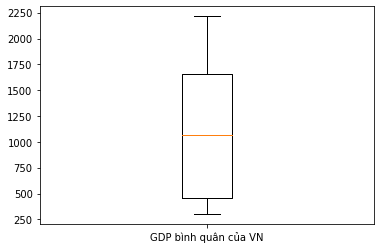

In [ ]:
# visualize boxplot
fig, ax = plt.subplots()
ax.boxplot(gdp)
plt.xticks([1], ["GDP bình quân của VN"])
plt.show()

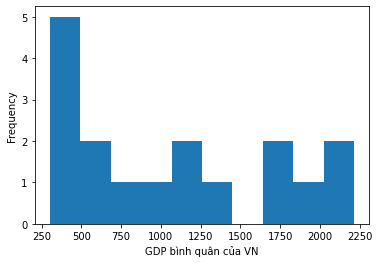

In [ ]:
# visualize histogram
plt.hist(gdp)
plt.ylabel('Frequency')
plt.xlabel('GDP bình quân của VN')
plt.show()

## Count
Sử dụng để đếm số lượng điểm dữ liệu hiện có trong bộ dữ liệu

In [ ]:
print('len year = {0}'.format(len(year)))
print('len gdp = {0}'.format(len(gdp)))

len year = 17
len gdp = 17


## Min
Cho ta biết được điểm dữ liệu mang giá trị nhỏ nhất trong toàn bộ dữ liệu

In [ ]:
print('min year = {0}'.format(min(year)))
print('min gdp = {0}'.format(min(gdp)))

min year = 2000.0
min gdp = 302.0


## Max
Cho ta biết được điểm dữ liệu mang giá trị lớn nhất trong toàn bộ dữ liệu

In [ ]:
print('max year = {0}'.format(max(year)))
print('max gdp = {0}'.format(max(gdp)))

max year = 2016.0
max gdp = 2215.0


## Mean
Cho ta biết được giá trị trung bình của một tập hợp số

In [ ]:
def mean_func(li_nums):
   return sum(li_nums) / len(li_nums)

In [ ]:
print('mean year = {0}'.format(mean_func(year)))
print('mean gdp = {0}'.format(mean_func(gdp)))

mean year = 2008.0
mean gdp = 1074.7058823529412


## Median
Trung vị là số nằm giữa một tập dữ liệu số đã được sắp xếp, có cùng số lượng điểm dữ liệu bên dưới và bên trên. Nó được sử dụng thay cho giá trị trung bình khi có các điểm ngoại lai trong bộ dữ liệu

In [ ]:
def median_func(li_nums):
   len_nums = len(li_nums)
   li_sorted = sorted(li_nums)
   mid_point = len_nums // 2
   if len_nums % 2 == 0:
      num_l = li_sorted[mid_point - 1]
      num_r = li_sorted[mid_point]
      return (num_l + num_r) / 2
   return li_sorted[mid_point]

In [ ]:
print('median year = {0}'.format(median_func(year)))
print('median gdp = {0}'.format(median_func(gdp)))

median year = 2008.0
median gdp = 1065.0


## Mode
Là điểm dữ liệu có tần suất xuất hiện nhiều nhất trong tập dữ liệu

In [7]:
def mode_func(li_nums):
   max_appearance = 0
   h_map = {}
   li_res = set()
   for num in li_nums:
      if num not in h_map:
        h_map[num] = 1
      else:
        h_map[num] += 1
      max_appearance = max(max_appearance, h_map[num])

   for key, value in h_map.items():
      if value == max_appearance:
        li_res.add(key)
   if len(li_res) == len(li_nums) or len(li_res) >= 2:
      return "N/A"
   return li_res

In [10]:
print('mode year = {0}'.format(mode_func(year)))
print('mode gdp = {0}'.format(mode_func(gdp)))

mode year = N/A
mode gdp = N/A


## Quantitle
Là dạng tổng quát của Median, Quantitle là những điểm cắt (cut points) chia tập dữ liệu thành p phần có số phần tử bằng nhau

In [ ]:
def quantile_func(li_nums, p):
   p_index = int(p * len(li_nums))
   return sorted(li_nums)[p_index]

In [ ]:
print('quantile year = {0}'.format(quantile_func(year, 0.2)))
print('quantile gdp = {0}'.format(quantile_func(gdp, 0.2)))

quantile year = 2003.0
quantile gdp = 389.0


## Range
Khoảng biến thiên của tập dữ liệu

In [ ]:
print('range year = {0}'.format(max(year) - min(year)))
print('range gdp = {0}'.format(max(gdp) - min(gdp)))

range year = 16.0
range gdp = 1913.0


## Variance
Dùng để đo sự phân tán dữ liệu

In [ ]:
def variance_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   return sum(deviations) / (n - 1)

In [ ]:
print('variance year = {0}'.format(variance_func(year)))
print('variance gdp = {0}'.format(variance_func(gdp)))

variance year = 25.5
variance gdp = 456430.5955882353


## Standard Deviation

In [ ]:
def std_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   return math.sqrt(variance)

In [ ]:
print('standard deviation of year = {0}'.format(std_func(year)))
print('standard deviation of gdp = {0}'.format(std_func(gdp)))

standard deviation of year = 5.049752469181039
standard deviation of gdp = 675.5964739311738


## Coefficient of Variation

In [ ]:
def cv_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   standard_variation = math.sqrt(variance)
   return standard_variation / mean

In [ ]:
print('coefficient of variation - year = {0}'.format(cv_func(year)))
print('coefficient of variation - gdp = {0}'.format(cv_func(gdp)))

coefficient of variation - year = 0.0025148169667236248
coefficient of variation - gdp = 0.6286338290547321


## Skewness

In [ ]:
from scipy.stats import skew

In [ ]:
print('skew year = {0}'.format(skew(year)))
print('skew gdp = {0}'.format(skew(gdp)))

skew year = 0.0
skew gdp = 0.3522907816440924


## Kurtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
print('kurtosis year = {0}'.format(kurtosis(year)))
print('kurtosis gdp = {0}'.format(kurtosis(gdp)))

kurtosis year = -1.2083333333333333
kurtosis gdp = -1.325623980881038


# Purchase Orders - Dataset

## Data Preprocessing

In [19]:
df_po = pd.read_excel('/content/drive/MyDrive/Datasets/Data Science Research/IS403/2. Purchase Orders.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [20]:
df_po.columns = df_po.iloc[1]
df_po = df_po[2:]

In [21]:
df_po.reset_index(inplace=True)
df_po = df_po.iloc[:, 1:]

In [ ]:
df_po

1,Supplier,Order No.,Item No.,Item Description,Item Cost,Quantity,Cost per order,A/P Terms (Months),Order Date,Arrival Date
0,Alum Sheeting,A0223,4224,Bolt-nut package,3.95,4500,17775,30,2011-10-15 00:00:00,2011-10-20 00:00:00
1,Alum Sheeting,A0433,5417,Control Panel,255,500,127500,30,2011-10-20 00:00:00,2011-10-27 00:00:00
2,Alum Sheeting,A0443,1243,Airframe fasteners,4.25,10000,42500,30,2011-08-08 00:00:00,2011-08-14 00:00:00
3,Alum Sheeting,A0446,5417,Control Panel,255,406,103530,30,2011-09-01 00:00:00,2011-09-10 00:00:00
4,Alum Sheeting,B0247,1243,Airframe fasteners,4.25,9000,38250,30,2011-09-05 00:00:00,2011-09-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...
89,Steelpin Inc.,B3222,8008,Machined Valve,645,150,96750,30,2011-10-15 00:00:00,2011-10-26 00:00:00
90,Steelpin Inc.,B3333,8008,Machined Valve,645,100,64500,30,2011-10-10 00:00:00,2011-10-21 00:00:00
91,Steelpin Inc.,C0456,5677,Side Panel,195,130,25350,30,2011-10-28 00:00:00,2011-11-07 00:00:00
92,Steelpin Inc.,C0467,8008,Machined Valve,645,120,77400,30,2011-10-28 00:00:00,2011-11-04 00:00:00


In [ ]:
df_po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Supplier            94 non-null     object
 1   Order No.           94 non-null     object
 2   Item No.            94 non-null     object
 3   Item Description    94 non-null     object
 4   Item Cost           94 non-null     object
 5   Quantity            94 non-null     object
 6   Cost per order      94 non-null     object
 7   A/P Terms (Months)  94 non-null     object
 8   Order Date          94 non-null     object
 9   Arrival Date        94 non-null     object
dtypes: object(10)
memory usage: 7.5+ KB


In [22]:
df_po['Item No.'].astype(int)
df_po['Item Cost'].astype(int)
df_po['Quantity'].astype(int)
df_po['Cost per order'].astype(int)
df_po['A/P Terms (Months)'].astype(int)

0     30
1     30
2     30
3     30
4     30
      ..
89    30
90    30
91    30
92    30
93    30
Name: A/P Terms (Months), Length: 94, dtype: int64

In [23]:
item_no = df_po['Item No.']
item_cost = df_po['Item Cost']
quantity = df_po['Quantity']
cost_per_ord = df_po['Cost per order']
ap_term = df_po['A/P Terms (Months)']

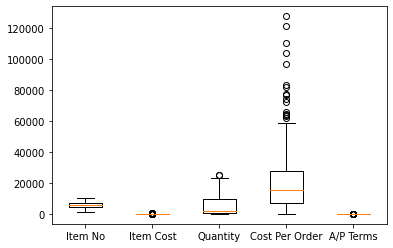

In [ ]:
# visualize boxplot
columns = [item_no, item_cost, quantity, cost_per_ord, ap_term]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5], ["Item No", "Item Cost", "Quantity", "Cost Per Order", "A/P Terms"])
plt.show()

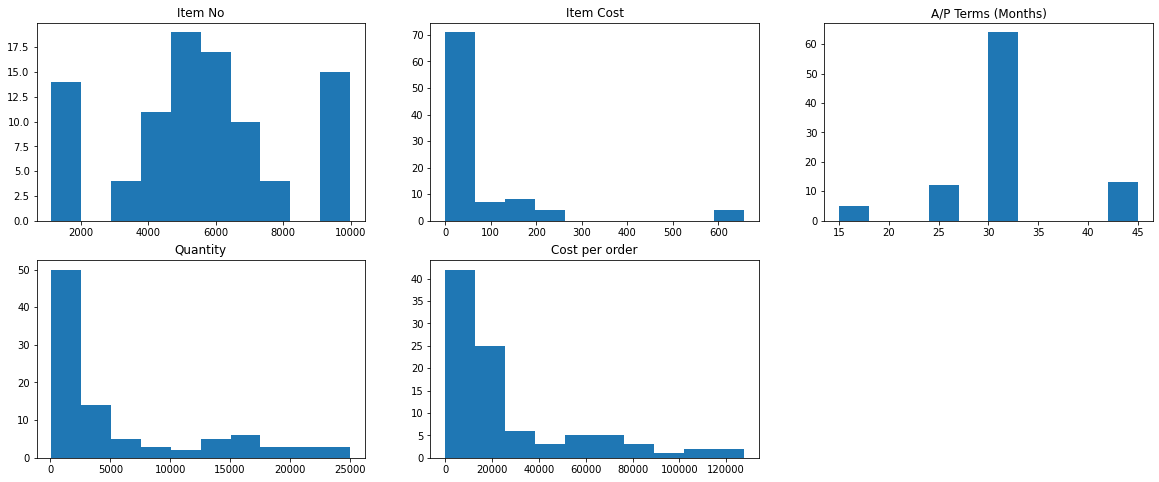

In [ ]:
# visualize histogram
fig, ax = plt.subplots(2, 3, figsize=(20, 8))
ax[0][0].hist(item_no)
ax[0][0].set_title("Item No")
ax[0][1].hist(item_cost)
ax[0][1].set_title("Item Cost")
ax[1][0].hist(quantity)
ax[1][0].set_title("Quantity")
ax[1][1].hist(cost_per_ord)
ax[1][1].set_title("Cost per order")
ax[0][2].hist(ap_term)
ax[0][2].set_title("A/P Terms (Months)")
ax[1][2].set_visible(False)
plt.show()

## Count
Sử dụng để đếm số lượng điểm dữ liệu hiện có trong bộ dữ liệu

In [ ]:
print('len item no = {0}'.format(len(item_no)))
print('len item cost = {0}'.format(len(item_cost)))
print('len quantity = {0}'.format(len(quantity)))
print('len cost per ord = {0}'.format(len(cost_per_ord)))
print('len ap term = {0}'.format(len(ap_term)))

len item no = 94
len item cost = 94
len quantity = 94
len cost per ord = 94
len ap term = 94


## Min
Cho ta biết được điểm dữ liệu mang giá trị nhỏ nhất trong toàn bộ dữ liệu

In [ ]:
print('min item no = {0}'.format(min(item_no)))
print('min item cost = {0}'.format(min(item_cost)))
print('min quantity = {0}'.format(min(quantity)))
print('min cost per ord = {0}'.format(min(cost_per_ord)))
print('min ap term = {0}'.format(min(ap_term)))

min item no = 1122
min item cost = 0.55
min quantity = 90
min cost per ord = 68.75
min ap term = 15


## Max
Cho ta biết được điểm dữ liệu mang giá trị lớn nhất trong toàn bộ dữ liệu

In [ ]:
print('max item no = {0}'.format(max(item_no)))
print('max item cost = {0}'.format(max(item_cost)))
print('max quantity = {0}'.format(max(quantity)))
print('max cost per ord = {0}'.format(max(cost_per_ord)))
print('max ap term = {0}'.format(max(ap_term)))

max item no = 9977
max item cost = 655.5
max quantity = 25000
max cost per ord = 127500
max ap term = 45


## Mean
Cho ta biết được giá trị trung bình của một tập hợp số

In [ ]:
def mean_func(li_nums):
   return sum(li_nums) / len(li_nums)

In [ ]:
print('mean item no = {0}'.format(mean_func(item_no)))
print('mean item cost = {0}'.format(mean_func(item_cost)))
print('mean quantity = {0}'.format(mean_func(quantity)))
print('mean cost per ord = {0}'.format(mean_func(cost_per_ord)))
print('mean ap term = {0}'.format(mean_func(ap_term)))

mean item no = 5616.553191489362
mean item cost = 62.64095744680854
mean quantity = 5857.404255319149
mean cost per ord = 26295.31914893617
mean ap term = 30.638297872340427


## Median
Trung vị là số nằm giữa một tập dữ liệu số đã được sắp xếp, có cùng số lượng điểm dữ liệu bên dưới và bên trên. Nó được sử dụng thay cho giá trị trung bình khi có các điểm ngoại lai trong bộ dữ liệu

In [ ]:
def median_func(li_nums):
   len_nums = len(li_nums)
   li_sorted = sorted(li_nums)
   mid_point = len_nums // 2
   if len_nums % 2 == 0:
      num_l = li_sorted[mid_point - 1]
      num_r = li_sorted[mid_point]
      return (num_l + num_r) / 2
   return li_sorted[mid_point]

In [ ]:
print('median item no = {0}'.format(median_func(item_no)))
print('median item cost = {0}'.format(median_func(item_cost)))
print('median quantity = {0}'.format(median_func(quantity)))
print('median cost per ord = {0}'.format(median_func(cost_per_ord)))
print('median ap term = {0}'.format(median_func(ap_term)))

median item no = 5462.0
median item cost = 3.7
median quantity = 1915.0
median cost per ord = 15656.25
median ap term = 30.0


## Mode
Là điểm dữ liệu có tần suất xuất hiện nhiều nhất trong tập dữ liệu

In [24]:
def mode_func(li_nums):
   max_appearance = 0
   h_map = {}
   li_res = set()
   for num in li_nums:
      if num not in h_map:
        h_map[num] = 1
      else:
        h_map[num] += 1
      max_appearance = max(max_appearance, h_map[num])

   for key, value in h_map.items():
      if value == max_appearance:
        li_res.add(key)
   if len(li_res) == len(li_nums) or len(li_res) >= 2:
      return "N/A"
   return li_res

In [25]:
print('mode item no = {0}'.format(mode_func(item_no)))
print('mode item cost = {0}'.format(mode_func(item_cost)))
print('mode quantity = {0}'.format(mode_func(quantity)))
print('mode cost per ord = {0}'.format(mode_func(cost_per_ord)))
print('mode ap term = {0}'.format(mode_func(ap_term)))

mode item no = {1122}
mode item cost = {4.25}
mode quantity = {150}
mode cost per ord = N/A
mode ap term = {30}


## Quantitle
Là dạng tổng quát của Median, Quantitle là những điểm cắt (cut points) chia tập dữ liệu thành p phần có số phần tử bằng nhau

In [ ]:
def quantile_func(li_nums, p):
   p_index = int(p * len(li_nums))
   return sorted(li_nums)[p_index]

In [ ]:
print('quantile item no = {0}'.format(quantile_func(item_no, 0.2)))
print('quantile item cost = {0}'.format(quantile_func(item_cost, 0.2)))
print('quantile quantity = {0}'.format(quantile_func(quantity, 0.2)))
print('quantile cost per ord = {0}'.format(quantile_func(cost_per_ord, 0.2)))
print('quantile ap term = {0}'.format(quantile_func(ap_term, 0.2)))

quantile item no = 4111
quantile item cost = 1.25
quantile quantity = 150
quantile cost per ord = 5365.5
quantile ap term = 30


## Range
Khoảng biến thiên của tập dữ liệu

In [ ]:
print('range item no = {0}'.format(max(item_no) - min(item_no)))
print('range item cost = {0}'.format(max(item_cost) - min(item_cost)))
print('range quantity = {0}'.format(max(quantity) - min(quantity)))
print('range cost per ord = {0}'.format(max(cost_per_ord) - min(cost_per_ord)))
print('range ap term = {0}'.format(max(ap_term) - min(ap_term)))

range item no = 8855
range item cost = 654.95
range quantity = 24910
range cost per ord = 127431.25
range ap term = 30


## Variance
Dùng để đo sự phân tán dữ liệu

In [ ]:
def variance_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   return sum(deviations) / (n - 1)

In [ ]:
print('variance item no = {0}'.format(variance_func(item_no)))
print('variance item cost = {0}'.format(variance_func(item_cost)))
print('variance quantity = {0}'.format(variance_func(quantity)))
print('variance cost per ord = {0}'.format(variance_func(cost_per_ord)))
print('variance ap term = {0}'.format(variance_func(ap_term)))

variance item no = 6727517.2605810985
variance item cost = 20165.28075068634
variance quantity = 52597359.490734406
variance cost per ord = 890594573.8244683
variance ap term = 46.3623884694579


## Standard Deviation

In [ ]:
def std_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   return math.sqrt(variance)

In [ ]:
print('standard deviation item no = {0}'.format(std_func(item_no)))
print('standard deviation item cost = {0}'.format(std_func(item_cost)))
print('standard deviation quantity = {0}'.format(std_func(quantity)))
print('standard deviation cost per ord = {0}'.format(std_func(cost_per_ord)))
print('standard deviation ap term = {0}'.format(std_func(ap_term)))

standard deviation item no = 2593.7457972170478
standard deviation item cost = 142.00450961390746
standard deviation quantity = 7252.403704340679
standard deviation cost per ord = 29842.83119652806
standard deviation ap term = 6.808993205273294


## Coefficient of Variation

In [ ]:
def cv_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   standard_variation = math.sqrt(variance)
   return standard_variation / mean

In [ ]:
print('coefficient of variation - item no = {0}'.format(cv_func(item_no)))
print('coefficient of variation - item cost = {0}'.format(cv_func(item_cost)))
print('coefficient of variation - quantity = {0}'.format(cv_func(quantity)))
print('coefficient of variation - cost per ord = {0}'.format(cv_func(cost_per_ord)))
print('coefficient of variation - ap term = {0}'.format(cv_func(ap_term)))

coefficient of variation - item no = 0.46180383391495217
coefficient of variation - item cost = 2.266959436794853
coefficient of variation - quantity = 1.2381600088050473
coefficient of variation - cost per ord = 1.1349104008777704
coefficient of variation - ap term = 0.22223797267211445


## Skewness

In [ ]:
from scipy.stats import skew

In [ ]:
print('skew item no = {0}'.format(skew(item_no)))
print('skew item cost = {0}'.format(skew(item_cost)))
print('skew quantity = {0}'.format(skew(quantity)))
print('skew cost per ord = {0}'.format(skew(cost_per_ord)))
print('skew ap term = {0}'.format(skew(ap_term)))

skew item no = -0.09264844866470075
skew item cost = 3.1061815008862377
skew quantity = 1.2354934231383419
skew cost per ord = 1.6375953906008645
skew ap term = 0.5896595576079535


## Kurtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
print('kurtosis item no = {0}'.format(kurtosis(item_no)))
print('kurtosis item cost = {0}'.format(kurtosis(item_cost)))
print('kurtosis quantity = {0}'.format(kurtosis(quantity)))
print('kurtosis cost per ord = {0}'.format(kurtosis(cost_per_ord)))
print('kurtosis ap term = {0}'.format(kurtosis(ap_term)))

kurtosis item no = -0.5755192834192204
kurtosis item cost = 9.7041830649311
kurtosis quantity = 0.1818551414860119
kurtosis cost per ord = 1.9074955851197553
kurtosis ap term = 1.3697841132748136


# Computer Repair Times - Dataset

## Data Preprocessing

In [11]:
df_crt = pd.read_excel('/content/drive/MyDrive/Datasets/Data Science Research/IS403/3. Computer Repair Times.xlsx')

In [ ]:
df_crt

,Computer Repair Times,Unnamed: 1
0,NaN,NaN
1,Sample,Repair Time (Days)
2,1,18
3,2,15
4,3,17
...,...,...
247,246,18
248,247,31
249,248,6
250,249,17


In [12]:
df_crt.columns = df_crt.iloc[1]
df_crt = df_crt[2:]

In [13]:
df_crt.reset_index(inplace=True)
df_crt = df_crt.iloc[:, 1:]

In [ ]:
df_crt

1,Sample,Repair Time (Days)
0,1,18
1,2,15
2,3,17
3,4,9
4,5,37
...,...,...
245,246,18
246,247,31
247,248,6
248,249,17


In [17]:
repair_times = df_crt['Repair Time (Days)']

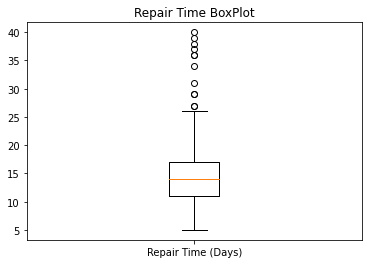

In [16]:
# visualize boxplot
fig, ax = plt.subplots()
ax.boxplot(repair_times)
ax.set_title('Repair Time BoxPlot')
plt.xticks([1], ["Repair Time (Days)"])
plt.show()

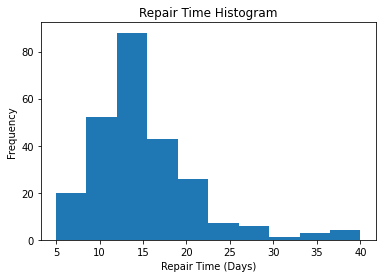

In [ ]:
# visualize histogram
fig, ax = plt.subplots()
ax.hist(repair_times)
ax.set_title('Repair Time Histogram')
plt.ylabel('Frequency')
plt.xlabel('Repair Time (Days)');
plt.show()

## Count
Sử dụng để đếm số lượng điểm dữ liệu hiện có trong bộ dữ liệu

In [ ]:
len(repair_times)

250

## Min
Cho ta biết được điểm dữ liệu mang giá trị nhỏ nhất trong toàn bộ dữ liệu

In [ ]:
print('min repair times = {0}'.format(min(repair_times)))

min repair times = 5


## Max
Cho ta biết được điểm dữ liệu mang giá trị lớn nhất trong toàn bộ dữ liệu

In [ ]:
print('max repair times = {0}'.format(max(repair_times)))

max repair times = 40


## Mean
Cho ta biết được giá trị trung bình của một tập hợp số

In [ ]:
def mean_func(li_nums):
   return sum(li_nums) / len(li_nums)

In [ ]:
print('mean repair times = {0}'.format(mean_func(repair_times)))

mean repair times = 14.912


## Median
Trung vị là số nằm giữa một tập dữ liệu số đã được sắp xếp, có cùng số lượng điểm dữ liệu bên dưới và bên trên. Nó được sử dụng thay cho giá trị trung bình khi có các điểm ngoại lai trong bộ dữ liệu

In [ ]:
def median_func(li_nums):
   len_nums = len(li_nums)
   li_sorted = sorted(li_nums)
   mid_point = len_nums // 2
   if len_nums % 2 == 0:
      num_l = li_sorted[mid_point - 1]
      num_r = li_sorted[mid_point]
      return (num_l + num_r) / 2
   return li_sorted[mid_point]

In [ ]:
print('median repair times = {0}'.format(median_func(repair_times)))

median repair times = 14.0


## Mode
Là điểm dữ liệu có tần suất xuất hiện nhiều nhất trong tập dữ liệu

In [14]:
def mode_func(li_nums):
   max_appearance = 0
   h_map = {}
   li_res = set()
   for num in li_nums:
      if num not in h_map:
        h_map[num] = 1
      else:
        h_map[num] += 1
      max_appearance = max(max_appearance, h_map[num])

   for key, value in h_map.items():
      if value == max_appearance:
        li_res.add(key)
   if len(li_res) == len(li_nums) or len(li_res) >= 2:
      return "N/A"
   return li_res

In [18]:
print('mode repair times = {0}'.format(mode_func(repair_times)))

mode repair times = N/A


## Quantitle
Là dạng tổng quát của Median, Quantitle là những điểm cắt (cut points) chia tập dữ liệu thành p phần có số phần tử bằng nhau

In [ ]:
def quantile_func(li_nums, p):
   p_index = int(p * len(li_nums))
   return sorted(li_nums)[p_index]

In [ ]:
print('quantile repair times = {0}'.format(quantile_func(repair_times, 0.2)))

quantile repair times = 10


## Range
Khoảng biến thiên của tập dữ liệu

In [ ]:
print('range repair times = {0}'.format(max(repair_times) - min(repair_times)))

range repair times = 35


## Variance
Dùng để đo sự phân tán dữ liệu

In [ ]:
def variance_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   return sum(deviations) / (n - 1)

In [ ]:
print('variance repair times = {0}'.format(variance_func(repair_times)))

variance repair times = 35.50226506024093


## Standard Deviation

In [ ]:
def std_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   return math.sqrt(variance)

In [ ]:
print('standard deviation repair times = {0}'.format(std_func(repair_times)))

standard deviation repair times = 5.958377720507565


## Coefficient of Variation

In [ ]:
def cv_func(li_nums):
   n = len(li_nums)
   mean = sum(li_nums) / n
   deviations = [(value - mean)**2 for value in li_nums]

   variance = sum(deviations) / (n - 1)
   standard_variation = math.sqrt(variance)
   return standard_variation / mean

In [ ]:
print('coefficient of variation - repair times = {0}'.format(cv_func(repair_times)))

coefficient of variation - repair times = 0.3995693213859687


## Skewness

In [ ]:
from scipy.stats import skew

In [ ]:
print('skew repair times = {0}'.format(skew(repair_times)))

skew repair times = 1.6850869214811048


## Kurtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
print('kurtosis repair times = {0}'.format(kurtosis(repair_times)))

kurtosis repair times = 3.973994110805113
